In [382]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os, json, time, copy, re

### Creating the DataFrame

In [418]:
df = pd.read_json('products.json')

In [419]:
df.head()

,company,name,price,discount,specs,material,rating,numBuyers
0,Skechers,Men Black Equalizer - Double Play Slip-On Snea...,₹5249,(25% OFF),Special Technology:\nSkechers Memory Foam Gel-...,Mesh\nWipe with clean and dry cloth to remove ...,4.4\n|\n145 Ratings,145 Verified Buyers
1,Skechers,Men Black Equalizer - Double Play Slip-On Snea...,₹5249,(25% OFF),Special Technology:\nSkechers Memory Foam Gel-...,Mesh\nWipe with clean and dry cloth to remove ...,4.4\n|\n145 Ratings,145 Verified Buyers
2,BEONZA,Unisex Sliders Flip Flops,₹599,(40% OFF),A pair of grey solid sliders\nSynthetic upper\...,"Synthetic\nWipe with a clean, dry cloth to rem...",None,None
3,boAt,Airdopes Black 163 M with ASAP Charge In the E...,₹1399,(Rs. 1091 OFF),This item cannot be returned.,None,4.1\n|\n7.7k Ratings,7.7k Verified Buyers
4,OnePlus,Nord Buds 2r True Wireless in Ear Earbuds with...,₹2199,(Rs. 100 OFF),This item cannot be returned.,None,4.4\n|\n147 Ratings,147 Verified Buyers


### Level 0 Analysis

In [420]:
df.columns

Index(['company', 'name', 'price', 'discount', 'specs', 'material', 'rating',
       'numBuyers'],
      dtype='object')

In [421]:
df.shape

(4099, 8)

In [422]:
df = df.applymap(lambda x: x.strip() if type(x)==str or type(x)==object else x)

In [423]:
df.tail()

,company,name,price,discount,specs,material,rating,numBuyers
4094,Libas,Women Burgundy Floral Motifs Embroidered Sequi...,₹2219,(63% OFF),Burgundy embroidered Kurta with Churidar & dup...,"Size worn by the model: S\nChest: 32""\nWaist: ...",4.5\n|\n367 Ratings,367 Verified Buyers
4095,Puma,Women Pink Sneakers,₹1799,(60% OFF),"A pair of round toe pink sneakers ,has regular...",Mesh\nWipe with a clean dry cloth to remove dust,4.3\n|\n614 Ratings,614 Verified Buyers
4096,Roadster,The Lifestyle Co Women Navy Blue Skinny Fit Mi...,₹764,(55% OFF),Navy blue medium wash 5-pocket mid-rise croppe...,Skinny Fit\nStretchable\nThe model (height 5'8...,3.9\n|\n1.4k Ratings,1.4k Verified Buyers
4097,RANGMANCH BY PANTALOONS,Embellished Sequined Mandarin Collar Thread Wo...,Rs. 1299,None,Colour: navy blue\nEmbellished\nMandarin colla...,The model (height 5'8) is wearing a size S,None,None
4098,Anouk,Women Floral Printed Pure Cotton Kurta,₹519,(60% OFF),Colour: grey and white\nFloral printed\nRound ...,"Size worn by the model: S\nChest: 31""\nHeight:...",4.3\n|\n104 Ratings,104 Verified Buyers


In [424]:
def price(x):
    pattern = re.compile(r'(?:₹|Rs\.)\s*(\d+)')
    match = re.match(pattern, x)
    if match is not None:
        return int(match.group(1))
    else:
        return None

df['price'] = df['price'].map(lambda x: price(str(x)));

In [425]:
df['discount'] = df['discount'].map(lambda x: x[1:-1]);

In [426]:
df.head()

,company,name,price,discount,specs,material,rating,numBuyers
0,Skechers,Men Black Equalizer - Double Play Slip-On Snea...,5249.0,25% OFF,Special Technology:\nSkechers Memory Foam Gel-...,Mesh\nWipe with clean and dry cloth to remove ...,4.4\n|\n145 Ratings,145 Verified Buyers
1,Skechers,Men Black Equalizer - Double Play Slip-On Snea...,5249.0,25% OFF,Special Technology:\nSkechers Memory Foam Gel-...,Mesh\nWipe with clean and dry cloth to remove ...,4.4\n|\n145 Ratings,145 Verified Buyers
2,BEONZA,Unisex Sliders Flip Flops,599.0,40% OFF,A pair of grey solid sliders\nSynthetic upper\...,"Synthetic\nWipe with a clean, dry cloth to rem...",None,None
3,boAt,Airdopes Black 163 M with ASAP Charge In the E...,1399.0,Rs. 1091 OFF,This item cannot be returned.,None,4.1\n|\n7.7k Ratings,7.7k Verified Buyers
4,OnePlus,Nord Buds 2r True Wireless in Ear Earbuds with...,2199.0,Rs. 100 OFF,This item cannot be returned.,None,4.4\n|\n147 Ratings,147 Verified Buyers


In [427]:
df['specs'] = df['specs'].map(lambda x: ' '.join(list(x.split('\n'))));
df['material'] = df['material'].map(lambda x: ' '.join(list(x.split('\n'))));

In [428]:
df.tail()

,company,name,price,discount,specs,material,rating,numBuyers
4094,Libas,Women Burgundy Floral Motifs Embroidered Sequi...,2219.0,63% OFF,Burgundy embroidered Kurta with Churidar & dup...,"Size worn by the model: S Chest: 32"" Waist: 28...",4.5\n|\n367 Ratings,367 Verified Buyers
4095,Puma,Women Pink Sneakers,1799.0,60% OFF,"A pair of round toe pink sneakers ,has regular...",Mesh Wipe with a clean dry cloth to remove dust,4.3\n|\n614 Ratings,614 Verified Buyers
4096,Roadster,The Lifestyle Co Women Navy Blue Skinny Fit Mi...,764.0,55% OFF,Navy blue medium wash 5-pocket mid-rise croppe...,"Skinny Fit Stretchable The model (height 5'8"")...",3.9\n|\n1.4k Ratings,1.4k Verified Buyers
4097,RANGMANCH BY PANTALOONS,Embellished Sequined Mandarin Collar Thread Wo...,1299.0,on,Colour: navy blue Embellished Mandarin collar ...,The model (height 5'8) is wearing a size S,None,None
4098,Anouk,Women Floral Printed Pure Cotton Kurta,519.0,60% OFF,Colour: grey and white Floral printed Round ne...,"Size worn by the model: S Chest: 31"" Height: 5'7""",4.3\n|\n104 Ratings,104 Verified Buyers


In [429]:
def rating(x):
    try:
        temp = re.findall("\d+\.\d+", x)[0]
        if float(temp) > 5:
            return None
    except:
        temp = None       
    
    return temp

def numBuyers(x):
    if x == 'None':
        return None

    # Use regex to extract the numeric part with 'k' symbol
    match = re.match(r'^([\d.]+)k', x)

    if match:
        # Extract the numeric part and convert it to a decimal
        numeric_part = float(match.group(1))
        return int(numeric_part * 1000)
    else:
        # If no 'k' symbol found, treat the value as a regular integer
        match = re.match(r'^([\d.]+)', x)
        return int(match.group(1))

df['rating'] = df['rating'].map(lambda x: rating(x));
df['rating'] = df['rating'].astype(float);

df['numBuyers'] = df['numBuyers'].map(lambda x: numBuyers(str(x)));
df['numBuyers'] = df['numBuyers'].astype(float);

In [430]:
# Removing any whitespaces again
df = df.applymap(lambda x: x.strip() if type(x)==str or type(x)==object else x)

In [431]:
df.tail()

,company,name,price,discount,specs,material,rating,numBuyers
4094,Libas,Women Burgundy Floral Motifs Embroidered Sequi...,2219.0,63% OFF,Burgundy embroidered Kurta with Churidar & dup...,"Size worn by the model: S Chest: 32"" Waist: 28...",4.5,367.0
4095,Puma,Women Pink Sneakers,1799.0,60% OFF,"A pair of round toe pink sneakers ,has regular...",Mesh Wipe with a clean dry cloth to remove dust,4.3,614.0
4096,Roadster,The Lifestyle Co Women Navy Blue Skinny Fit Mi...,764.0,55% OFF,Navy blue medium wash 5-pocket mid-rise croppe...,"Skinny Fit Stretchable The model (height 5'8"")...",3.9,1400.0
4097,RANGMANCH BY PANTALOONS,Embellished Sequined Mandarin Collar Thread Wo...,1299.0,on,Colour: navy blue Embellished Mandarin collar ...,The model (height 5'8) is wearing a size S,NaN,NaN
4098,Anouk,Women Floral Printed Pure Cotton Kurta,519.0,60% OFF,Colour: grey and white Floral printed Round ne...,"Size worn by the model: S Chest: 31"" Height: 5'7""",4.3,104.0


In [432]:
# Checking NULL values, if any
df.isnull().sum()

company        0
name           0
price          3
discount       0
specs          0
material       0
rating       773
numBuyers    501
dtype: int64

In [433]:
# Defining some helper functions
def categorical_analyze(column_name):
    print(f'Number of Unique Values in {column_name} -: {len(df[column_name].unique())}')
    print(f'Number of Null Values in {column_name} -: {df[column_name].isnull().sum()}')
    print(f'\nMode (Most frequently occuring value) of {column_name} -: {df[column_name].mode()[0]}')
#     print(f'\nFrequency of each value in {column_name} -: \n{df[column_name].value_counts()}')
    
def numerical_analyze(column_name):
    print(f'Number of Null Values in {column_name} -: {df[column_name].isnull().sum()}')
    print(f'\nMean of {column_name} -: {df[column_name].mean()}')
    print(f'Median of {column_name} -: {df[column_name].median()}')
    print(f'Mode of {column_name} -: {df[column_name].mode()[0]}')
    print(f'Standard Deviation of {column_name} -: {df[column_name].std()}')

In [434]:
def chooseRandomColor():
    arr = np.array([x for x in mpl.colors.CSS4_COLORS.keys()])
    return np.random.choice(arr)

p1 = sns.color_palette('Set2')

In [435]:
def level_1_numerical_analysis(i, graph=True):
    numerical_analyze(i)
        
    if graph is True:
        fig, ax = plt.subplots(figsize=(10, 6)) # Rows, columns
        sns.histplot(x=df[i], color=chooseRandomColor(), ax=ax)    

### Level 1 Analysis

#### Company

In [436]:
categorical_analyze('company')

Number of Unique Values in company -: 592
Number of Null Values in company -: 0

Mode (Most frequently occuring value) of company -: Roadster


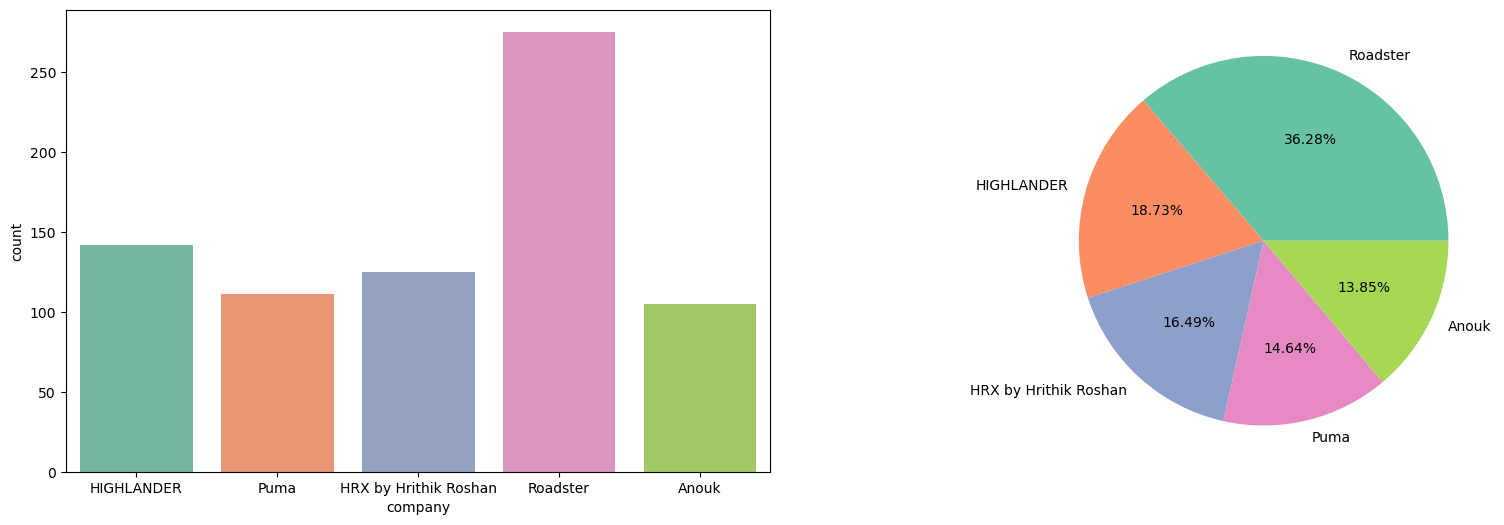

In [437]:
top_5 = df['company'].value_counts().head(5)
top_5_names = df[df['company'].isin(top_5.index)]

fig, ax = plt.subplots(1, 2, figsize=(20, 6))
sns.countplot(x = top_5_names['company'], palette=p1, ax=ax[0]);
ax[1].pie(top_5, colors=p1, labels=top_5.index, autopct='%.2f%%');

#### Price

Number of Null Values in price -: 3

Mean of price -: 1620.12158203125
Median of price -: 989.0
Mode of price -: 799.0
Standard Deviation of price -: 2675.154010809651


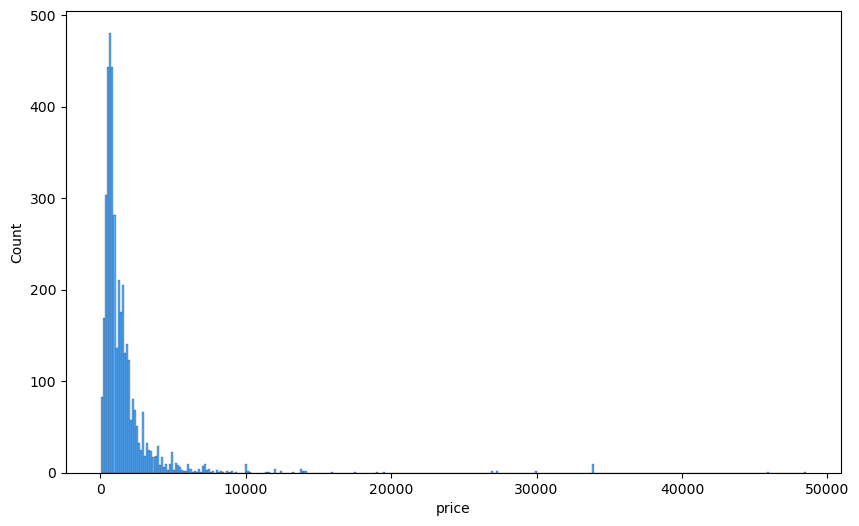

In [438]:
level_1_numerical_analysis('price')

#### Rating

Number of Null Values in rating -: 773

Mean of rating -: 4.152976548406494
Median of rating -: 4.2
Mode of rating -: 4.2
Standard Deviation of rating -: 0.4192817102290086


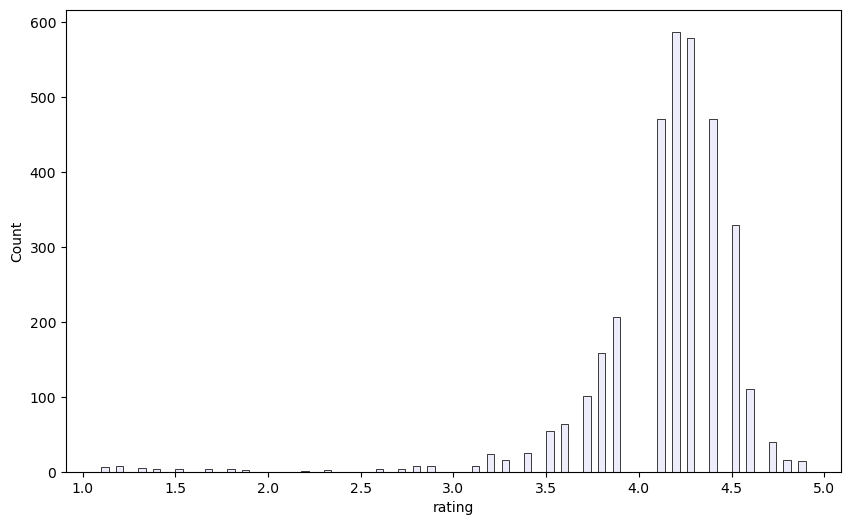

In [439]:
level_1_numerical_analysis('rating')

### Let us add 2 more columns for Product Category and Product Color

In [440]:
df['category'] = df['name'].map(lambda x: x.split(' ')[-1])
df['category'] = 

In [441]:
colors = ['black', 'grey', 'navy', 'white', 'gray', 'red', 'blue', 'green', 'yellow', 'orange', 'purple', 'pink', 'brown', 'cyan', 'magenta', 'lime', 'teal', 'lavender', 'indigo', 'maroon', 'gold', 'silver'] 

def get_color(x):
    
    for word in x.split(' '):
        if word.lower() in colors:
            return word
    return 'Not Mentioned'

df['color'] = df['name'].map(lambda x: get_color(x))

## Let's answer some questions about the data

#### 1. What are the top 10 most expensive products on Myntra?

In [442]:
most_exp = df.sort_values(by='price', ascending=False).head(10)
most_exp

,company,name,price,discount,specs,material,rating,numBuyers,category,color
952,Polo Ralph Lauren,Mock Collar Waterproof Sporty Jacket,48500.0,on,"Blue solid jacket, has front-open with full zi...",The model (height 6') is wearing a sizeS,NaN,NaN,Jacket,Not Mentioned
2065,dyson,Gift Edition Airwrap Hair Multi-Styler - Vinca...,45900.0,Rs. 2000 OFF,Gift Edition Airwrap Hair Multi-Styler - Vinca...,None,4.7,48.0,Rose,Blue
2961,CANDERE A KALYAN JEWELLERS COMPANY,Swastik 24KT Gold Coin-5 gram,33955.0,10% OFF,This item cannot be returned.,Height : 19.16 mm Width : 19.16 mm,4.8,13.0,gram,Gold
77,CANDERE A KALYAN JEWELLERS COMPANY,Lord Ganesh 24KT Gold Coin- 5 gram,33955.0,10% OFF,This item cannot be returned.,"Height : 19.16 mm Width : 19.16 mm,",NaN,12.0,gram,Gold
2091,CANDERE A KALYAN JEWELLERS COMPANY,Floral 24KT Gold Bar- 5 gram,33955.0,10% OFF,This item cannot be returned.,Height : 13.09 mm Width : 22.12 mm,4.9,42.0,gram,Gold
905,CANDERE A KALYAN JEWELLERS COMPANY,24KT Gold Coin-5 gram,33955.0,10% OFF,This item cannot be returned.,Height : 19.16 mm Width : 19.16 mm,NaN,11.0,gram,Gold
608,CANDERE A KALYAN JEWELLERS COMPANY,Swastik 24KT Gold Coin-5 gram,33955.0,10% OFF,This item cannot be returned.,Height : 19.16 mm Width : 19.16 mm,4.8,13.0,gram,Gold
3422,CANDERE A KALYAN JEWELLERS COMPANY,24KT Gold Coin-5 gram,33955.0,10% OFF,This item cannot be returned.,Height : 19.16 mm Width : 19.16 mm,NaN,11.0,gram,Gold
31,CANDERE A KALYAN JEWELLERS COMPANY,Floral 24KT Gold Bar- 5 gram,33955.0,10% OFF,This item cannot be returned.,Height : 13.09 mm Width : 22.12 mm,4.9,42.0,gram,Gold
2157,CANDERE A KALYAN JEWELLERS COMPANY,Lord Ganesh 24KT Gold Coin- 5 gram,33955.0,10% OFF,This item cannot be returned.,"Height : 19.16 mm Width : 19.16 mm,",NaN,12.0,gram,Gold


#### 2. Which brands have the highest average ratings?

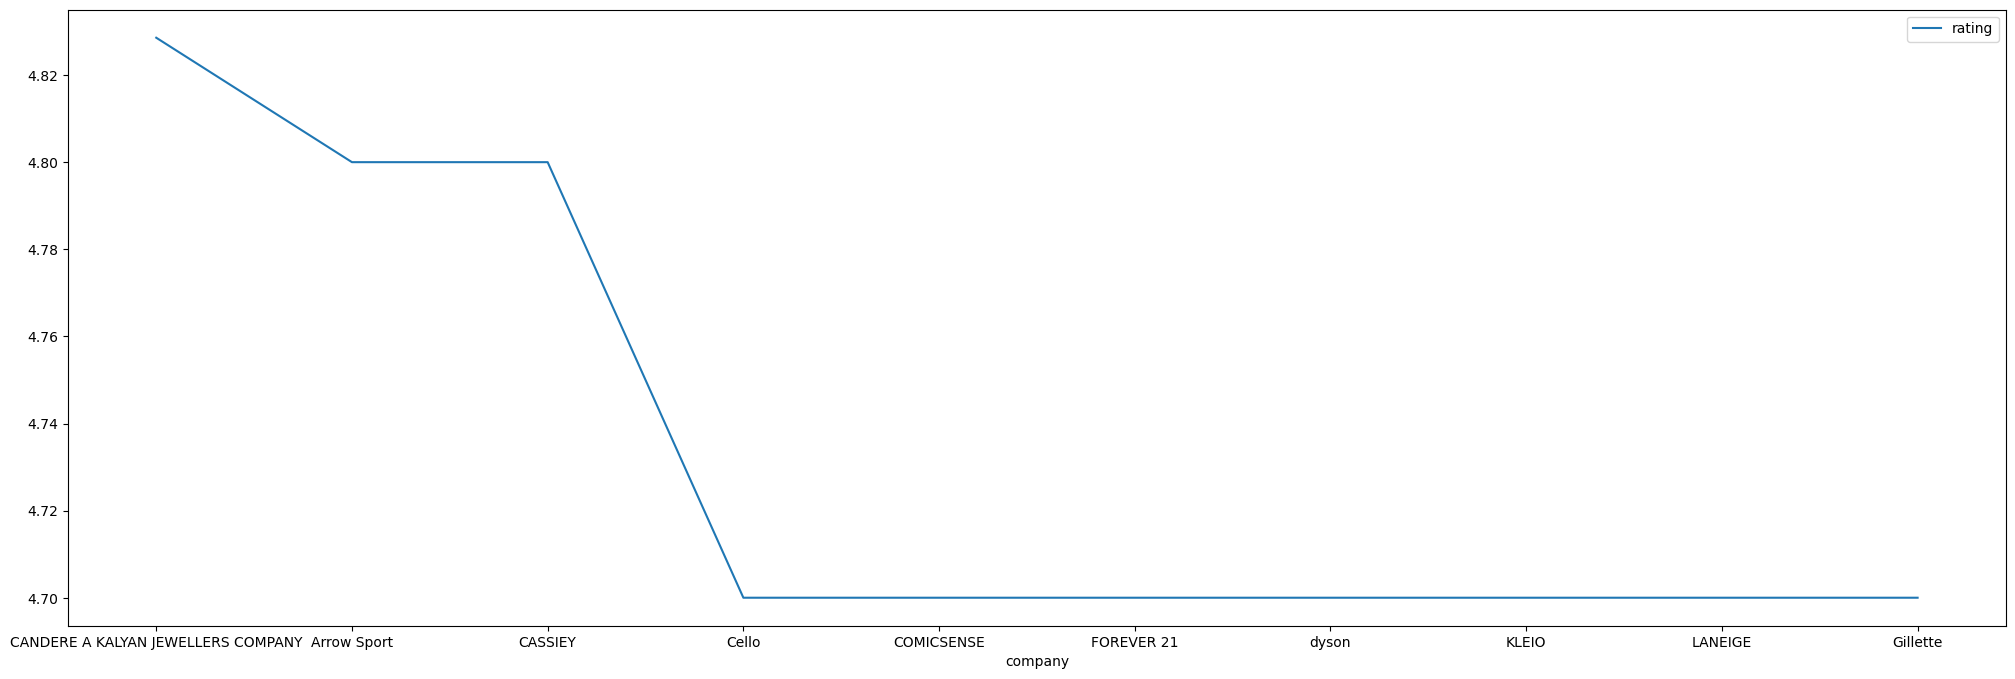

In [443]:
top_brands = df.pivot_table(index='company', values='rating', aggfunc='mean').sort_values(by='rating', ascending=False).head(10)

fig, ax = plt.subplots(figsize=(25, 8)) # Rows, columns
sns.lineplot(data=top_brands, color=chooseRandomColor());

#### 3. How many products are available in each category?

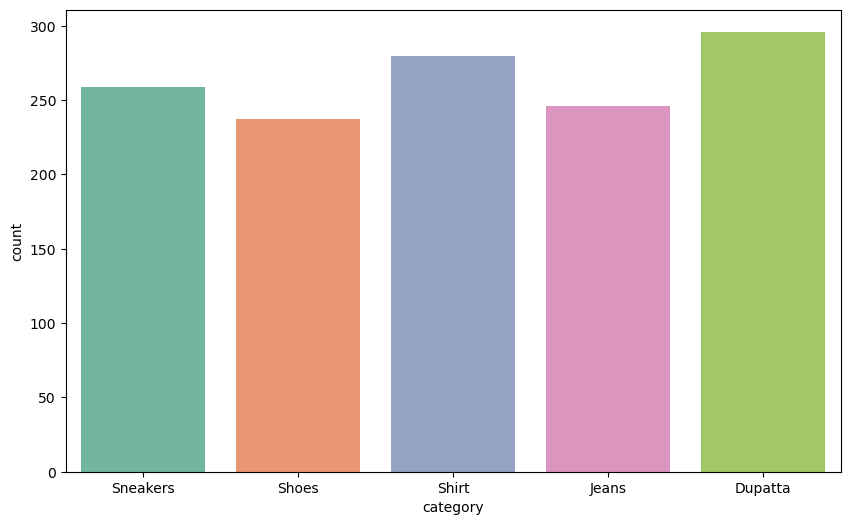

In [444]:
top_5 = df['category'].value_counts().head(5)
top_5_names = df[df['category'].isin(top_5.index)]

fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(x = top_5_names['category'], palette=p1, ax=ax);

#### 4. What is the correlation between product price and the number of buyers?

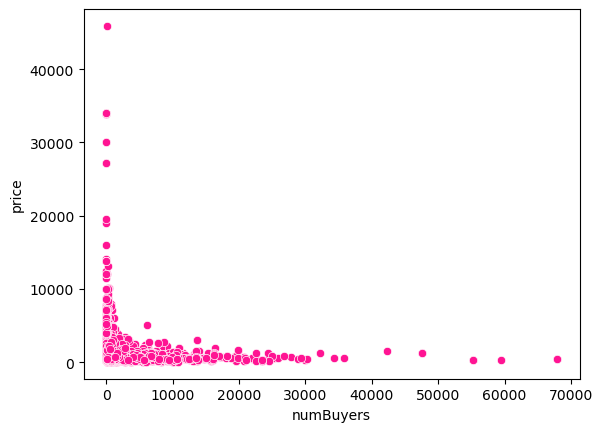

In [445]:
sns.scatterplot(data=df, x='numBuyers', y='price', color='deeppink');

#### 5. Which color is the most common among all products?

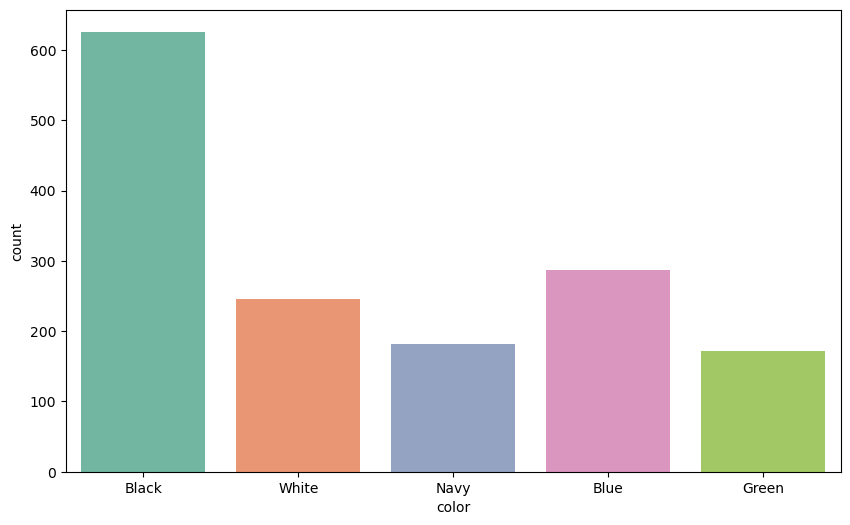

In [447]:
top_5 = df[df['color']!='Not Mentioned']['color'].value_counts().head(5)
top_5_names = df[df['color'].isin(top_5.index)]

fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(x = top_5_names['color'], palette=p1, ax=ax);

#### 6. What are the top 10 product categories with the cheapest average price?

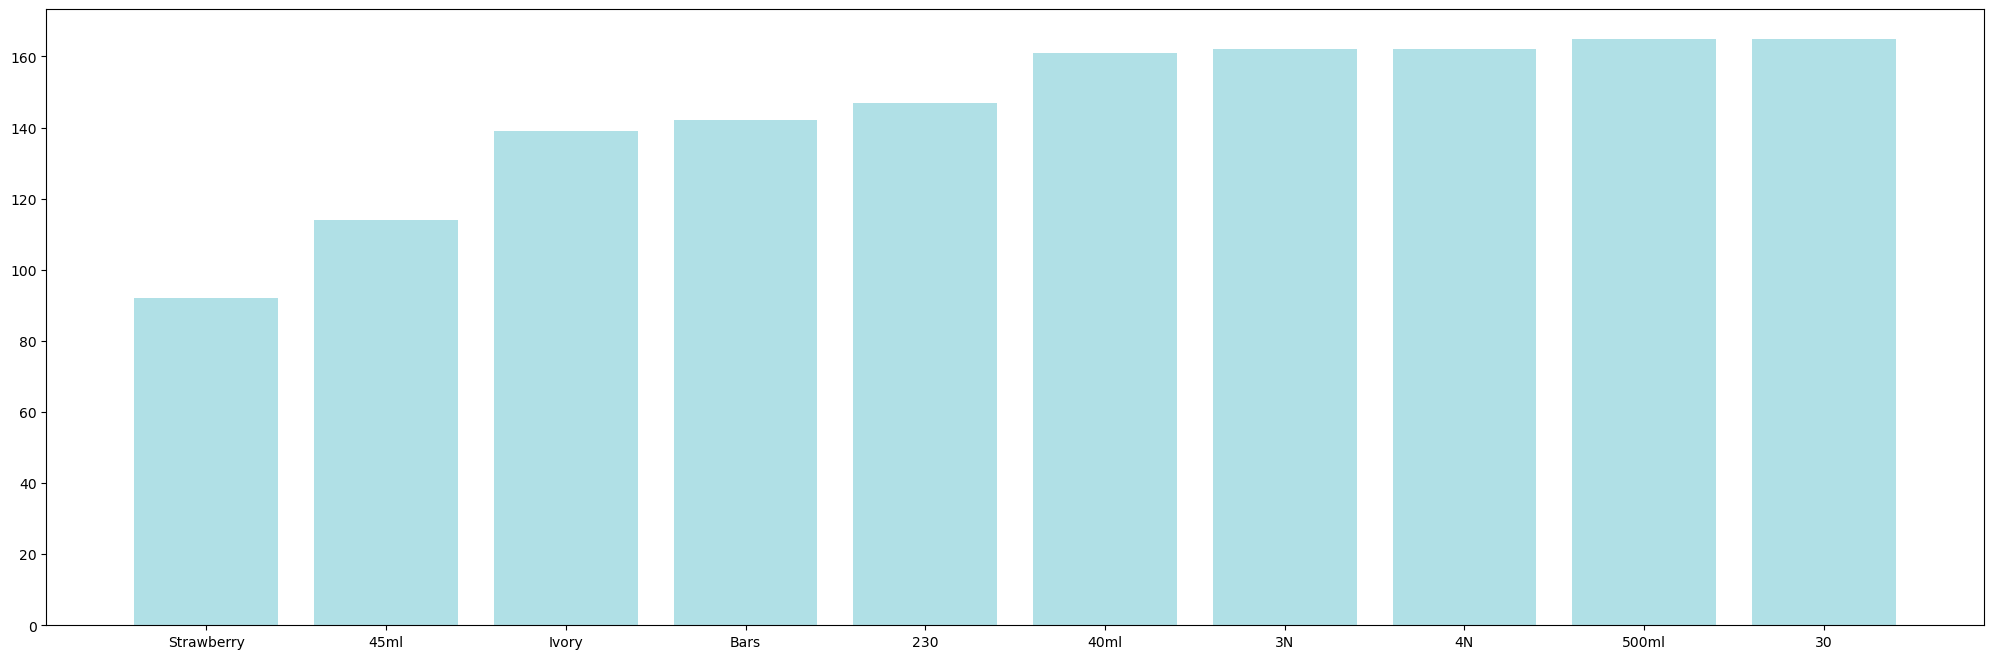

In [448]:
top_brands = df.pivot_table(index='category', values='price', aggfunc='mean').sort_values(by='price').head(10)
fig, ax = plt.subplots(figsize=(25, 8)) # Rows, columns
plt.bar(x=top_brands.index, height=top_brands.price, color='powderblue');

#### 7. What are the top 10 most common words in product descriptions?

In [452]:
common_words = {}

for i in df['specs']:
    for word in i.split(' '):
        word = word.lower()
        
        if word in ['stop', 'the', 'to', 'and', 'a', 'has', 'with', '', 'in', 'it', 'is', 'i', 'that', 'had', 'on', 'for', 'were', 'was', 'of', 'this'] or ':' in word:
            continue
        
        if word in common_words:
            common_words[word] += 1
        else:
            common_words[word] = 1

In [453]:
keys = list(common_words.keys())
values = list(common_words.values())
sorted_value_index = np.argsort(values)
top_10_common_words = {keys[i]: values[i] for i in sorted_value_index[-10:]}


In [454]:
top_10_common_words

{'black': 893,
 'closure': 972,
 'length': 996,
 'straight': 1002,
 'hem': 1036,
 'round': 1063,
 'sleeves': 1075,
 'printed': 1167,
 'solid': 1276,
 'regular': 2500}

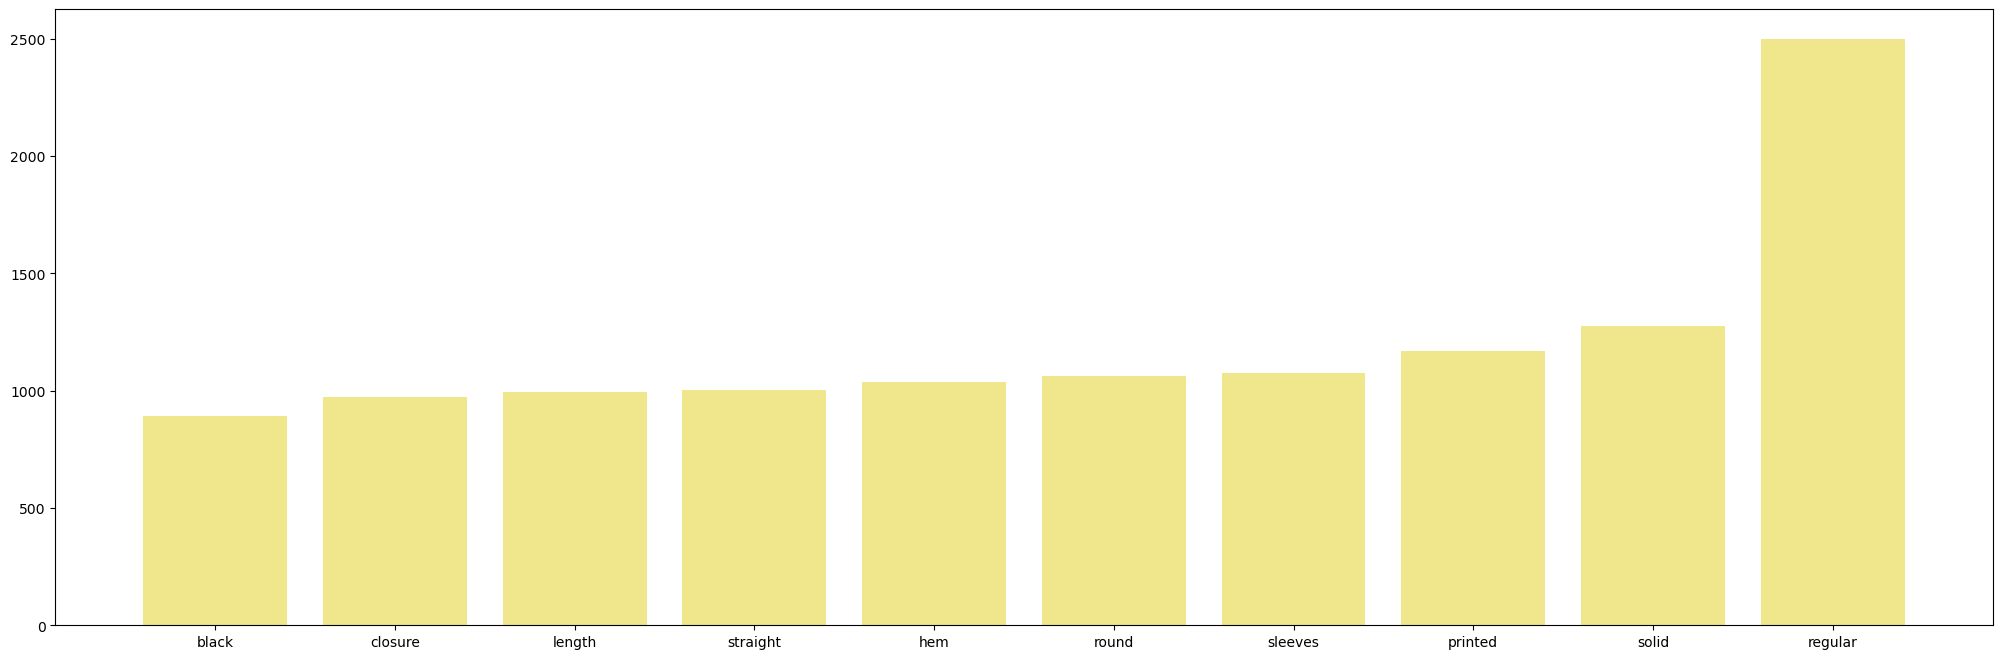

In [455]:
fig, ax = plt.subplots(figsize=(25, 8)) # Rows, columns
plt.bar(x=top_10_common_words.keys(), height=top_10_common_words.values(), color='khaki');

#### 8. Identify the top 5 categories with the highest number of buyers. Within those categories, find the company with the highest average rating.

In [499]:
top_5 = df.groupby('category').numBuyers.size().sort_values(ascending=False).head()
top_5_companies = []
top_5_values = []

In [500]:
for cat in top_5.index:
    comps = df[df['category']==cat].groupby('company').rating.mean().sort_values(ascending=False)
    top_5_companies.append(comps.index[0])
    top_5_values.append(comps[0])

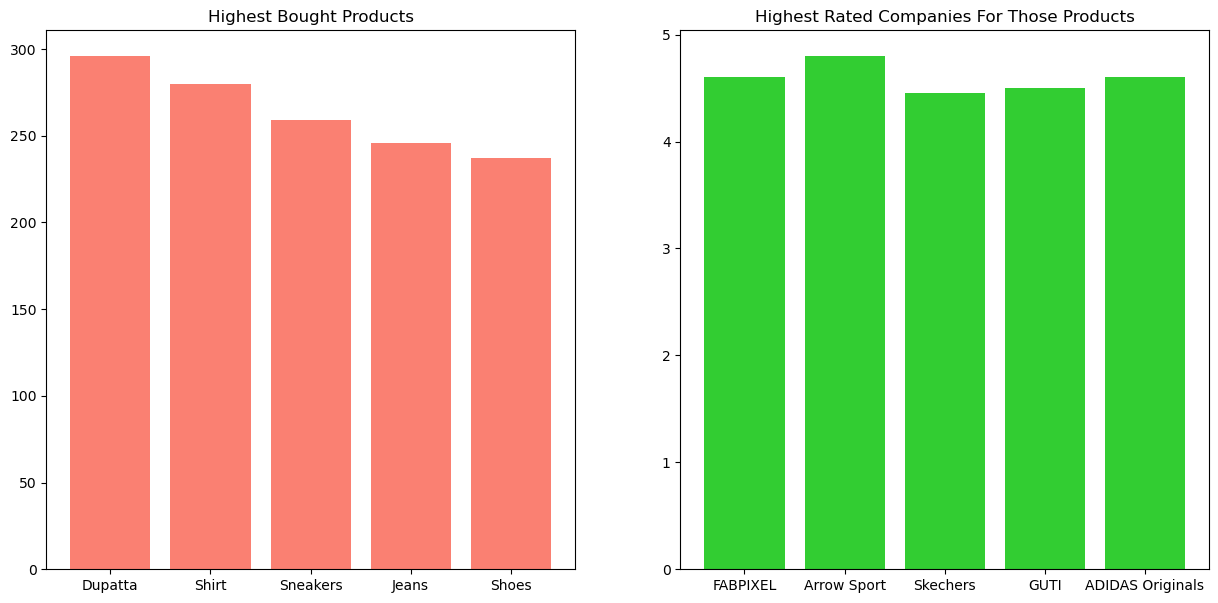

In [507]:
fig, ax = plt.subplots(1, 2, figsize=(15, 7))
ax[0].bar(x = top_5.index, height = top_5, color = 'salmon')
ax[0].set_title('Highest Bought Products')
ax[1].bar(x = top_5_companies, height = top_5_values, color='limegreen');
ax[1].set_title('Highest Rated Companies For Those Products');